<a href="https://colab.research.google.com/github/aldojda/MachineLearningUANL/blob/main/Tarea_1_ML_Selecci%C3%B3n_Base_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 1 ML : Selección de Base de Datos

In [ ]:
#importar librerias
import pandas as pd

In [ ]:
#importamos google coolab para trabajar con archivos de Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
ls gdrive/MyDrive/MachineLearningUANL/

 ChurnDataSet.csv  'Tarea2 ML : Tratamiento de Datos en python '
'Entregable 2 '


In [ ]:
df = pd.read_csv("gdrive/MyDrive/MachineLearningUANL/ChurnDataSet.csv")
df.drop(columns = 'Total'])
df.set_index('customerID', inplace = True)
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#contamos cuantos generos existen en la base de datos
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
#creamos nueva base del subgrupo Male (Filtrar por campo)
df_male = df[df.gender == 'Male'].copy()
print(df_male.shape)

(3555, 21)


In [ ]:
#al tener un subgrupo de clientes sólo hombres procedemos a eliminar la columna gender
print(df_male.shape)
df_male.drop(columns = 'gender', inplace = True)
print(df_male.shape)

(3555, 21)
(3555, 20)


In [ ]:
#vemos la estadística descriptiva del la variable de tenure
df_male.tenure.describe()

count    3555.000000
mean       32.495359
std        24.656359
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

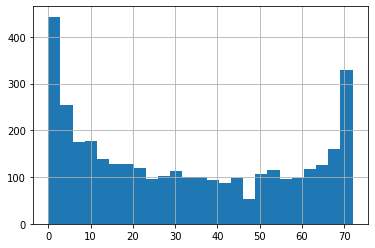

In [ ]:
df_male.tenure.hist(bins = 25)
#la distribución es bimodal, muestra que existieron 2 campañas de conquista de clientes.

In [ ]:
# generamos grupos deacuerdo al tenure [5 grupos]
df_male['tenure_range'] = pd.cut(df_male.tenure, bins = 5)

In [ ]:
# cantidad de nulos
df_male.isna().sum()

customerID          0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_range        0
dtype: int64